In [2]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from sklearn import metrics

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


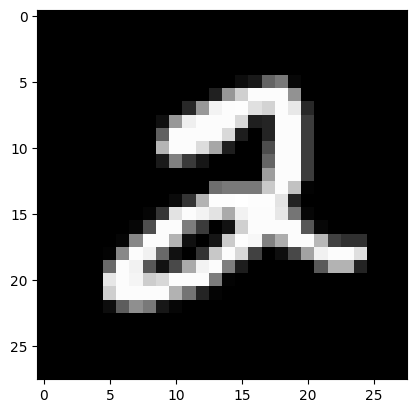

In [4]:
plt.imshow(x_train[5], cmap="gray")

In [5]:
print(x_train[5])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  13  25 100
  122   7   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  33 151 208 252 252
  252 146   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  40 152 244 252 253 224 211
  252 232  40   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  15 152 239 252 252 252 21

In [6]:
print("x_train shape: ", x_train.shape)
print("y_train shape: ", y_train.shape)
print("x_test shape: ", x_test.shape)
print("y_test shape: ", y_test.shape)

x_train shape:  (60000, 28, 28)
y_train shape:  (60000,)
x_test shape:  (10000, 28, 28)
y_test shape:  (10000,)


In [7]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [8]:
num_classes = 10
y_train = np.eye(num_classes)[y_train]
y_test = np.eye(num_classes)[y_test]

In [9]:
model = Sequential()
model.add(Dense(512, activation = "relu", input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation = "relu"))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation = "softmax"))

In [10]:
model.compile(loss = "categorical_crossentropy", optimizer = RMSprop(), metrics = ['accuracy'])

In [11]:
batch_size = 128
epochs = 20 
history = model.fit(x_train, y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1,
                    validation_data = (x_test, y_test))

Epoch 1/20
469/469 [==============================] - 8s 16ms/step - loss: 0.2571 - accuracy: 0.9203 - val_loss: 0.2034 - val_accuracy: 0.9356
Epoch 2/20
469/469 [==============================] - 7s 16ms/step - loss: 0.1044 - accuracy: 0.9683 - val_loss: 0.0928 - val_accuracy: 0.9722
Epoch 3/20
469/469 [==============================] - 9s 18ms/step - loss: 0.0756 - accuracy: 0.9774 - val_loss: 0.0713 - val_accuracy: 0.9793
Epoch 4/20
469/469 [==============================] - 8s 16ms/step - loss: 0.0594 - accuracy: 0.9815 - val_loss: 0.0762 - val_accuracy: 0.9775
Epoch 5/20
469/469 [==============================] - 7s 15ms/step - loss: 0.0491 - accuracy: 0.9847 - val_loss: 0.0691 - val_accuracy: 0.9804
Epoch 6/20
469/469 [==============================] - 8s 16ms/step - loss: 0.0399 - accuracy: 0.9873 - val_loss: 0.0821 - val_accuracy: 0.9775
Epoch 7/20
469/469 [==============================] - 7s 14ms/step - loss: 0.0357 - accuracy: 0.9887 - val_loss: 0.0706 - val_accuracy: 0.9800

In [12]:
score = model.evaluate(x_test, y_test, verbose = 0)
print("Test loss: ", score[0])
print("Test accuracy: ", score[1])

Test loss:  0.07979270070791245
Test accuracy:  0.9843999743461609
